# Importing Relevant Libraries


In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

We have used Combined data for multiple wells from KG basin.

# Importing Dataset

In [62]:
#importing required dataset
well_data = pd.read_csv("C:/Users/91725/Downloads/Well data.csv")

In [63]:
well_data.head()

,DEPTH(m),GR(API),RHOB,Vp(km/sec),Vsh,Pore Pres(psi)
0,22.0024,57.3820,1.4506,1.4614,0.033808,1609.0
1,22.1548,58.0070,1.4506,1.4594,0.044766,1609.0
2,22.3072,59.1046,1.4506,1.4577,0.064012,1609.0
3,22.4596,59.2124,1.4506,1.4567,0.065902,1609.0
4,22.6120,59.8294,1.4506,1.4564,0.076721,1609.0


# Exploratory data analysis and cleaning


## Checking for any null values 

<AxesSubplot:>

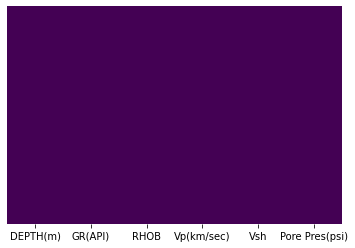

In [64]:
sns.heatmap(well_data.isnull(),cbar=False,yticklabels=False,cmap = 'viridis')

In [65]:
well_data.isnull().sum()

DEPTH(m)          0
GR(API)           0
RHOB              0
Vp(km/sec)        0
Vsh               0
Pore Pres(psi)    0
dtype: int64

No null values found. We have a complete dataset.

In [66]:
well_data.shape

(11578, 6)

Dataset comprises of 11578 observations and 6 characteristics.


In [67]:
well_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11578 entries, 0 to 11577
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   DEPTH(m)        11578 non-null  float64
 1   GR(API)         11578 non-null  float64
 2   RHOB            11578 non-null  float64
 3   Vp(km/sec)      11578 non-null  float64
 4   Vsh             11578 non-null  float64
 5   Pore Pres(psi)  11578 non-null  float64
dtypes: float64(6)
memory usage: 542.8 KB


In [68]:
well_data.describe()

,DEPTH(m),GR(API),RHOB,Vp(km/sec),Vsh,Pore Pres(psi)
count,11578.000000,11578.000000,11578.000000,11578.000000,11578.000000,11578.000000
mean,139.147663,91.849108,1.802710,-25.505982,0.655628,1835.732303
std,75.078632,9.561568,0.142273,162.319295,0.454907,231.192849
min,0.005200,22.888900,0.958700,-999.250000,-0.571000,169.000000
25%,77.332100,87.506050,1.735300,1.511000,0.572709,1665.507500
50%,132.466600,92.594150,1.816200,1.536700,0.671153,1821.000000
75%,190.943900,97.874475,1.900000,1.579900,0.757320,2005.000000
max,335.882800,114.995600,2.117400,1.724800,46.208200,2314.000000


Here in Vp and Vsh columns we noticed the minimum values are in negative order , which is undesired.
Thus we must remove these rows from our dataset.

In [69]:
for col in well_data.columns:
    print(col)

DEPTH(m)
GR(API)
RHOB
Vp(km/sec)
Vsh
Pore Pres(psi)


In [70]:
data = well_data[(well_data['Vp(km/sec)']>0) & (well_data['Vsh']>0)]

In [71]:
data.head()

,DEPTH(m),GR(API),RHOB,Vp(km/sec),Vsh,Pore Pres(psi)
0,22.0024,57.3820,1.4506,1.4614,0.033808,1609.0
1,22.1548,58.0070,1.4506,1.4594,0.044766,1609.0
2,22.3072,59.1046,1.4506,1.4577,0.064012,1609.0
3,22.4596,59.2124,1.4506,1.4567,0.065902,1609.0
4,22.6120,59.8294,1.4506,1.4564,0.076721,1609.0


In [72]:
data.isnull().sum()

DEPTH(m)          0
GR(API)           0
RHOB              0
Vp(km/sec)        0
Vsh               0
Pore Pres(psi)    0
dtype: int64

In [73]:
data.describe()

,DEPTH(m),GR(API),RHOB,Vp(km/sec),Vsh,Pore Pres(psi)
count,11161.000000,11161.000000,11161.000000,11161.000000,11161.000000,11161.000000
mean,139.281205,92.186175,1.804847,1.550435,0.661681,1838.386396
std,74.542294,8.614295,0.135265,0.048822,0.456158,230.048471
min,5.948800,43.278800,0.958700,1.443300,0.000391,169.000000
25%,77.635600,87.631400,1.737100,1.514100,0.575205,1667.007900
50%,131.425600,92.594500,1.815700,1.539800,0.671262,1827.000000
75%,191.407600,97.860200,1.899700,1.581000,0.756670,2007.000000
max,335.882800,114.995600,2.113800,1.724800,46.208200,2314.000000


In [74]:
data.shape

(11161, 6)

Here all the minimum values in all the columns are in acceptable ranges.

# visualising correlations between characteristics

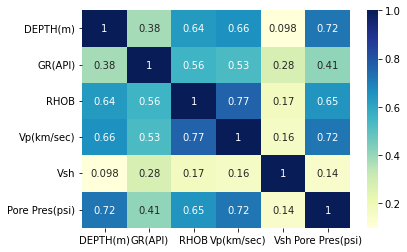

In [75]:
dataplot = sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)
  
# displaying heatmap correlation matrixplt

plt.show()

In [76]:
D1 = data.iloc[0:1000]
D1.head()

,DEPTH(m),GR(API),RHOB,Vp(km/sec),Vsh,Pore Pres(psi)
0,22.0024,57.3820,1.4506,1.4614,0.033808,1609.0
1,22.1548,58.0070,1.4506,1.4594,0.044766,1609.0
2,22.3072,59.1046,1.4506,1.4577,0.064012,1609.0
3,22.4596,59.2124,1.4506,1.4567,0.065902,1609.0
4,22.6120,59.8294,1.4506,1.4564,0.076721,1609.0


# Basic Visualisation

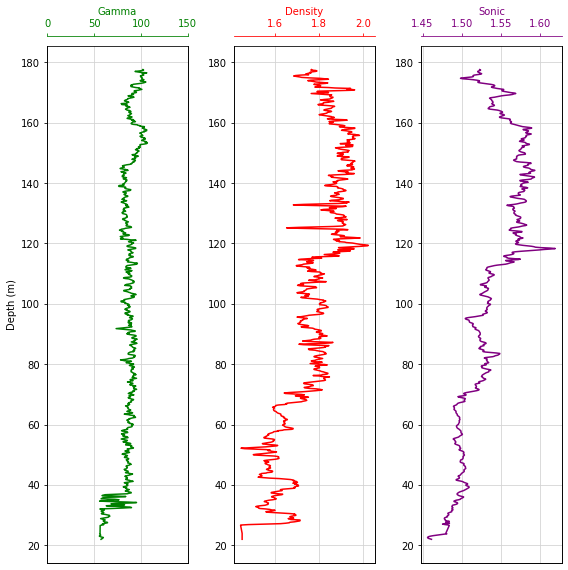

In [77]:

fig, ax = plt.subplots(figsize=(8,8))

#Set up the plot axes
ax1 = plt.subplot2grid((1,3), (0,0), rowspan=1, colspan = 1)
ax2 = plt.subplot2grid((1,3), (0,1), rowspan=1, colspan = 1)
ax3 = plt.subplot2grid((1,3), (0,2), rowspan=1, colspan = 1)


# As our curve scales will be detached from the top of the track,
# this code adds the top border back in without dealing with splines
ax7 = ax1.twiny()
ax7.xaxis.set_visible(False)
ax8 = ax2.twiny()
ax8.xaxis.set_visible(False)
ax9 = ax3.twiny()
ax9.xaxis.set_visible(False)

# Gamma Ray track
ax1.plot(D1['GR(API)'],D1['DEPTH(m)'],  color='green')
ax1.set_xlabel("Gamma")
ax1.xaxis.label.set_color("green")

ax1.set_ylabel("Depth (m)")
ax1.tick_params(axis='x', colors="green")
ax1.spines["top"].set_edgecolor("green")
ax1.title.set_color('green')
ax1.set_xticks([0, 50, 100, 150])

# Density track
ax2.plot(D1["RHOB"], D1["DEPTH(m)"], color = "red")
ax2.set_xlabel("Density")
ax2.xaxis.label.set_color("red")
ax2.tick_params(axis='x', colors="red")
ax2.spines["top"].set_edgecolor("red")
#ax2.set_xticks([1.95,2.00, 2.4])

# Sonic track
ax3.plot(D1["Vp(km/sec)"],D1["DEPTH(m)"],  color = "purple")
ax3.set_xlabel("Sonic")

ax3.xaxis.label.set_color("purple")
ax3.tick_params(axis='x', colors="purple")
ax3.spines["top"].set_edgecolor("purple")


# Common functions for setting up the plot can be extracted into
# a for loop. This saves repeating code.
for ax in [ax1, ax2, ax3]:
    
    ax.grid(which='major', color='lightgrey', linestyle='-')
    ax.xaxis.set_ticks_position("top")
    ax.xaxis.set_label_position("top")
    ax.spines["top"].set_position(("axes", 1.02))
    
    
plt.tight_layout()


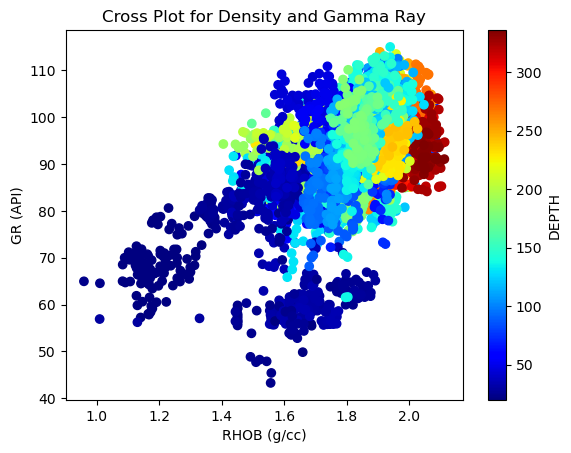

In [78]:
plt.style.use('default')
plt.scatter(x='RHOB', y='GR(API)', data=data, c='DEPTH(m)' , vmin=20, cmap='jet')
plt.xlabel("RHOB (g/cc)")
plt.ylabel("GR (API)")
plt.title("Cross Plot for Density and Gamma Ray")
plt.colorbar(label='DEPTH')
plt.show()

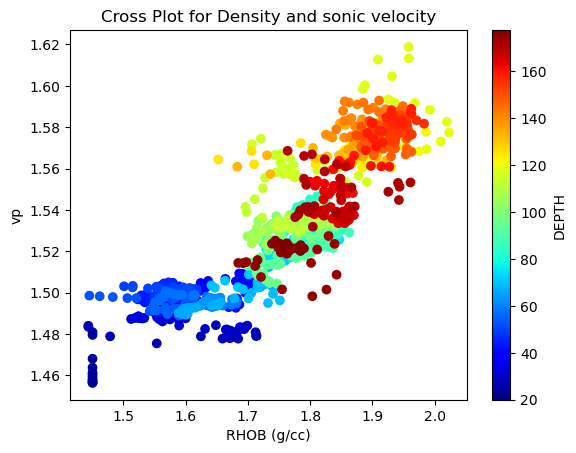

In [79]:
plt.style.use('default')
plt.scatter(x='RHOB', y='Vp(km/sec)', data=D1, c='DEPTH(m)' , vmin=20, cmap='jet')
plt.xlabel("RHOB (g/cc)")
plt.ylabel("vp")
plt.title("Cross Plot for Density and sonic velocity")
plt.colorbar(label='DEPTH')
plt.show()

# Assesing Outlier behaviour


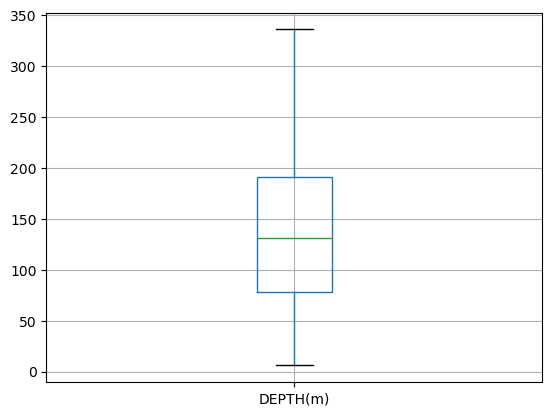

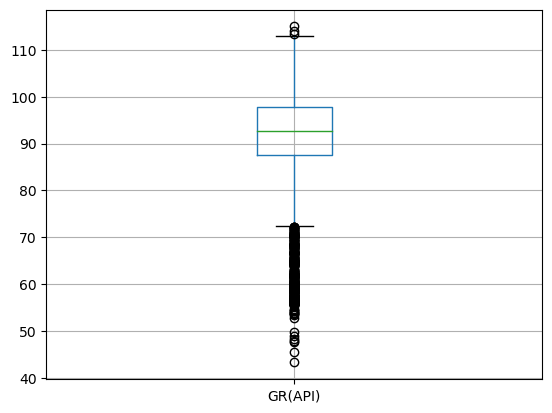

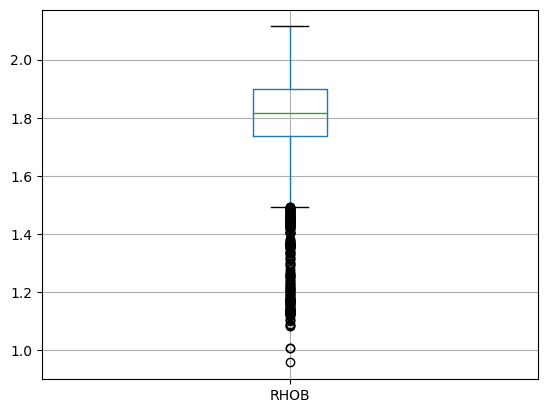

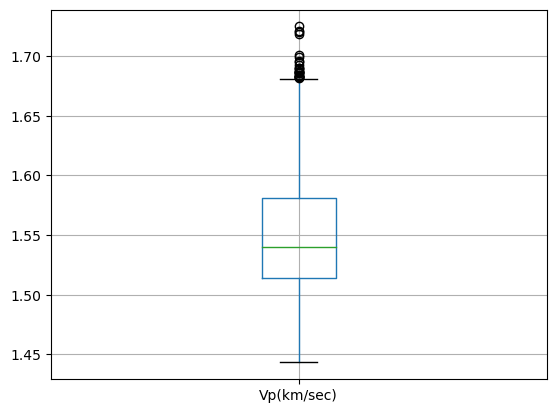

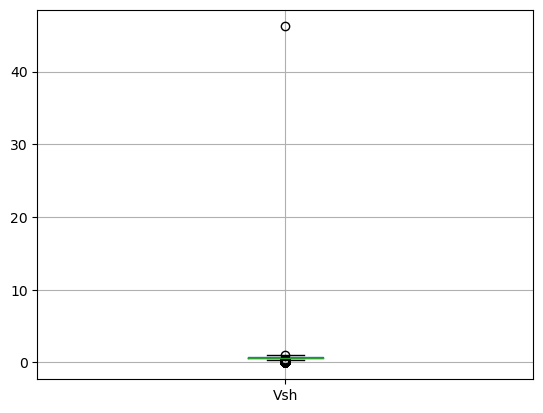

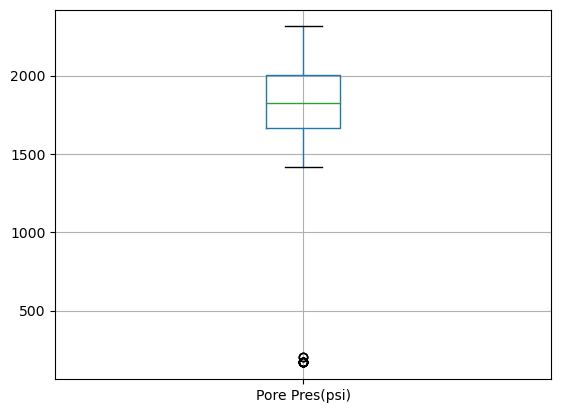

In [80]:
for column in data:
    plt.figure()
    data.boxplot([column])

Here, as visible GR ,Vp and RHOB are having considerable outliers.Thus, removing outliers becomes essential for further procedure.


In [81]:
data.isnull().sum()

DEPTH(m)          0
GR(API)           0
RHOB              0
Vp(km/sec)        0
Vsh               0
Pore Pres(psi)    0
dtype: int64

In [82]:
from sklearn.ensemble import IsolationForest
iso = IsolationForest(contamination=0.5)
yhat = iso.fit_predict(data)
mask = yhat != -1
data1 = data[mask]


C:\Users\91725\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [83]:
data1.shape

(5581, 6)

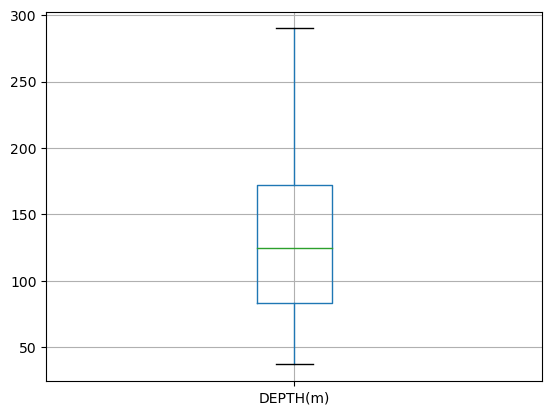

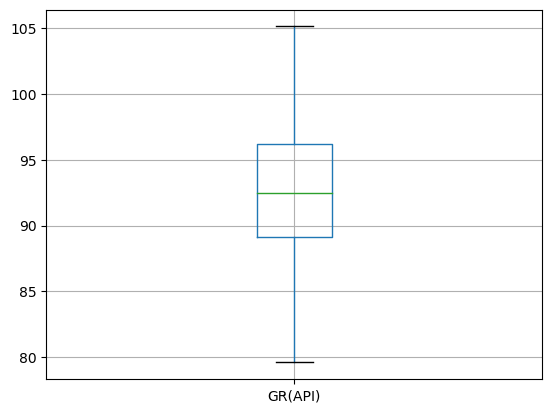

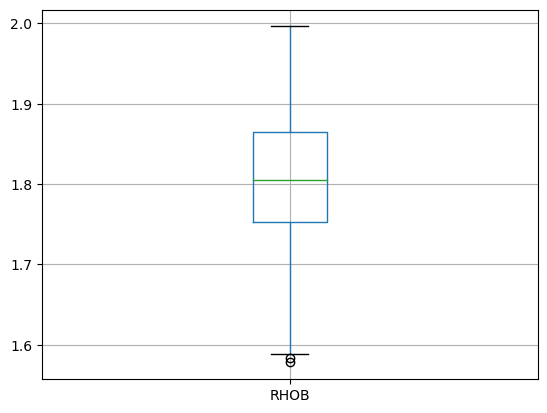

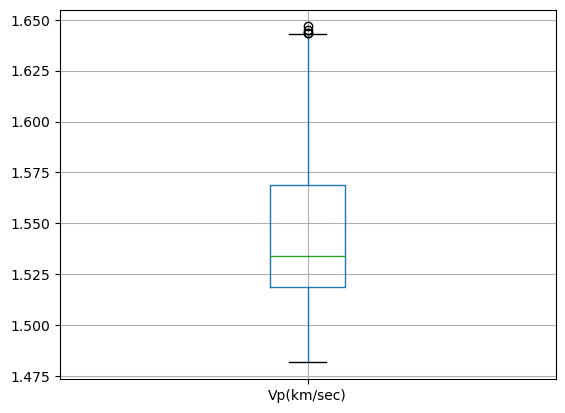

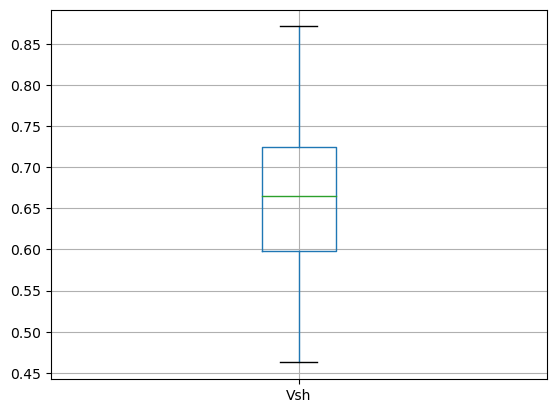

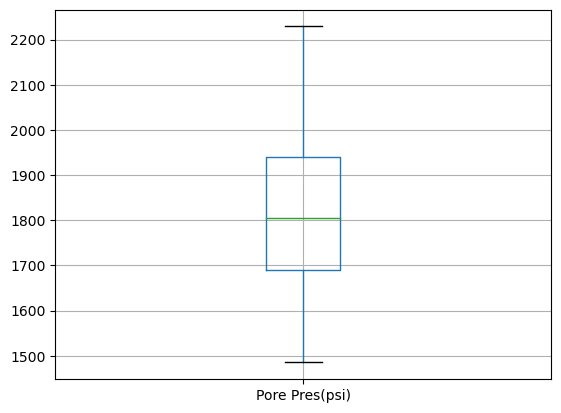

In [84]:
for column in data1:
    plt.figure()
    data1.boxplot([column])

In [85]:
data1.head()

,DEPTH(m),GR(API),RHOB,Vp(km/sec),Vsh,Pore Pres(psi)
94,39.0712,84.7768,1.6910,1.5087,0.514153,1626.0000
98,39.6808,84.9123,1.7065,1.5070,0.516529,1629.9921
99,39.8332,85.9856,1.7043,1.5055,0.535348,1630.0000
100,39.9856,85.0665,1.6997,1.5050,0.519232,1627.0000
101,40.1380,84.6472,1.7033,1.5061,0.511880,1628.0000


In [86]:
X = data1[['DEPTH(m)', 'GR(API)','RHOB','Vp(km/sec)','Vsh']]
Y = data1[['Pore Pres(psi)']]

In [87]:
 from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=500)

In [88]:
X_train.shape


(4464, 5)

In [89]:
y_train.shape

(4464, 1)

In [90]:
X_test.shape

(1117, 5)

In [91]:
y_test.shape

(1117, 1)

In [92]:
from xgboost import XGBRegressor
import xgboost as xgb

# Model Development(XGBOOST)

In [93]:
from numpy import loadtxt
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [94]:
model = XGBRegressor()
model.fit(X_train, y_train)


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

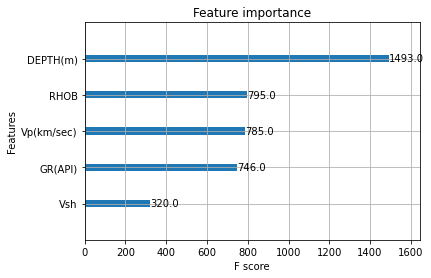

In [95]:
import matplotlib.pyplot as plt
%matplotlib inline

xgb.plot_importance(model, ax=plt.gca())

Most important variable is RHOB

# Predicting new values

In [96]:
predictions = model.predict(X_test)


In [97]:
predictions[0:10]

array([1687.7716, 1598.175 , 1750.511 , 1669.7354, 1739.8494, 1805.4655,
       1749.37  , 1736.6892, 1943.1206, 1625.1637], dtype=float32)

In [98]:
X_test.iloc[0]

DEPTH(m)      124.45740
GR(API)        99.19620
RHOB            1.90670
Vp(km/sec)      1.55750
Vsh             0.81064
Name: 11200, dtype: float64

In [99]:
y_test.iloc[0]

Pore Pres(psi)    1704.0081
Name: 11200, dtype: float64

This was just for a particular case,  lets see a general assesment of he same.

# Model error -- Training MSE

In [100]:
pred_train = model.predict(X_train)

In [101]:
from sklearn.metrics import mean_squared_error, r2_score  ## use function score   RMSE

In [102]:
print( r2_score(y_train, pred_train) ) # how much variance the model explains?

0.9760996339416637


In [103]:
print( mean_squared_error(y_train, pred_train) )  ##  lower -> better ?? 

602.6506571174614



# Model error -- Testing MSE

In [104]:
model.score(X_test, y_test)  ## R^2

0.8681400883290163

In [105]:
print(r2_score(y_test, predictions))

0.8681400883290163


In [106]:
print(mean_squared_error(y_test, predictions))

3316.2642931842456


What to do ??
Change train - test split size (test_size=0.33)
Optimize hyperparameters
Run Cross validation

In [107]:
from sklearn.ensemble import RandomForestRegressor

In [108]:
clf = RandomForestRegressor().fit(X_train, y_train)


C:\Users\91725\AppData\Local\Temp\ipykernel_14884\4274837363.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf = RandomForestRegressor().fit(X_train, y_train)


In [109]:
predictions = clf.predict(X_test)

In [110]:
clf.score(X_test, y_test)

0.8938746590503917

In [111]:
print(r2_score(y_test, predictions))

0.8938746590503917


In [112]:
import tensorflow as tf

In [113]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [114]:
ann = tf.keras.models.Sequential()

In [115]:
ann.add(tf.keras.layers.Dense(units=6,activation="relu"))

In [116]:
ann.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))

In [117]:
ann.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])

In [118]:
ann.fit(X_train,y_train,batch_size=32,epochs = 100)

Epoch 1/100
140/140 [==============================] - 1s 2ms/step - loss: -828.4392 - accuracy: 0.0000e+00
Epoch 2/100
140/140 [==============================] - 0s 2ms/step - loss: -2745.0906 - accuracy: 0.0000e+00
Epoch 3/100
140/140 [==============================] - 0s 2ms/step - loss: -5955.6060 - accuracy: 0.0000e+00
Epoch 4/100
140/140 [==============================] - 0s 2ms/step - loss: -10774.1543 - accuracy: 0.0000e+00
Epoch 5/100
140/140 [==============================] - 0s 2ms/step - loss: -17749.4141 - accuracy: 0.0000e+00
Epoch 6/100
140/140 [==============================] - 0s 2ms/step - loss: -27580.7715 - accuracy: 0.0000e+00
Epoch 7/100
140/140 [==============================] - 0s 2ms/step - loss: -40479.9531 - accuracy: 0.0000e+00
Epoch 8/100
140/140 [==============================] - 0s 2ms/step - loss: -55683.2500 - accuracy: 0.0000e+00
Epoch 9/100
140/140 [==============================] - 0s 2ms/step - loss: -72856.1953 - accuracy: 0.0000e+00
Epoch 10/100
1

140/140 [==============================] - 0s 2ms/step - loss: -3789880.0000 - accuracy: 0.0000e+00
Epoch 75/100
140/140 [==============================] - 0s 2ms/step - loss: -3881009.0000 - accuracy: 0.0000e+00
Epoch 76/100
140/140 [==============================] - 0s 2ms/step - loss: -3973036.0000 - accuracy: 0.0000e+00
Epoch 77/100
140/140 [==============================] - 0s 2ms/step - loss: -4065986.5000 - accuracy: 0.0000e+00
Epoch 78/100
140/140 [==============================] - 0s 2ms/step - loss: -4159984.0000 - accuracy: 0.0000e+00
Epoch 79/100
140/140 [==============================] - 0s 2ms/step - loss: -4254973.0000 - accuracy: 0.0000e+00
Epoch 80/100
140/140 [==============================] - 0s 2ms/step - loss: -4350893.0000 - accuracy: 0.0000e+00
Epoch 81/100
140/140 [==============================] - 0s 2ms/step - loss: -4447696.0000 - accuracy: 0.0000e+00
Epoch 82/100
140/140 [==============================] - 0s 2ms/step - loss: -4545528.5000 - accuracy: 0.0000e

In [128]:
standard_scaler = StandardScaler()
x_train_scaled = pd.DataFrame(
      standard_scaler.fit_transform(X_train))
x_test_scaled = pd.DataFrame(
      standard_scaler.transform(X_test))

In [137]:
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.losses import MeanSquaredLogarithmicError

In [138]:
hidden_units1 = 160
hidden_units2 = 480
hidden_units3 = 256
learning_rate = 0.01
# Creating model using the Sequential in tensorflow
def build_model_using_sequential():
  model = Sequential([
    Dense(hidden_units1, kernel_initializer='normal', activation='relu'),
    Dropout(0.2),
    Dense(hidden_units2, kernel_initializer='normal', activation='relu'),
    Dropout(0.2),
    Dense(hidden_units3, kernel_initializer='normal', activation='relu'),
    Dense(1, kernel_initializer='normal', activation='linear')
  ])
  return model
# build the model
model = build_model_using_sequential()

In [142]:
msle = MeanSquaredLogarithmicError()
model.compile(
    loss=msle, 
    optimizer=Adam(learning_rate=learning_rate), 
    metrics=[msle]
)
history = model.fit(
    x_train_scaled.values, 
    y_train.values, 
    epochs=100, 
    batch_size=64,
    validation_split=0.2
)

Epoch 1/100
56/56 [==============================] - 1s 11ms/step - loss: 0.0036 - mean_squared_logarithmic_error: 0.0036 - val_loss: 0.0018 - val_mean_squared_logarithmic_error: 0.0018
Epoch 2/100
56/56 [==============================] - 0s 7ms/step - loss: 0.0027 - mean_squared_logarithmic_error: 0.0027 - val_loss: 0.0018 - val_mean_squared_logarithmic_error: 0.0018
Epoch 3/100
56/56 [==============================] - 0s 7ms/step - loss: 0.0028 - mean_squared_logarithmic_error: 0.0028 - val_loss: 0.0017 - val_mean_squared_logarithmic_error: 0.0017
Epoch 4/100
56/56 [==============================] - 0s 7ms/step - loss: 0.0028 - mean_squared_logarithmic_error: 0.0028 - val_loss: 0.0018 - val_mean_squared_logarithmic_error: 0.0018
Epoch 5/100
56/56 [==============================] - 0s 6ms/step - loss: 0.0028 - mean_squared_logarithmic_error: 0.0028 - val_loss: 0.0021 - val_mean_squared_logarithmic_error: 0.0021
Epoch 6/100
56/56 [==============================] - 0s 5ms/step - loss: 0

56/56 [==============================] - 0s 5ms/step - loss: 0.0029 - mean_squared_logarithmic_error: 0.0029 - val_loss: 0.0026 - val_mean_squared_logarithmic_error: 0.0026
Epoch 46/100
56/56 [==============================] - 0s 5ms/step - loss: 0.0028 - mean_squared_logarithmic_error: 0.0028 - val_loss: 0.0021 - val_mean_squared_logarithmic_error: 0.0021
Epoch 47/100
56/56 [==============================] - 0s 5ms/step - loss: 0.0029 - mean_squared_logarithmic_error: 0.0029 - val_loss: 0.0017 - val_mean_squared_logarithmic_error: 0.0017
Epoch 48/100
56/56 [==============================] - 0s 8ms/step - loss: 0.0027 - mean_squared_logarithmic_error: 0.0027 - val_loss: 0.0018 - val_mean_squared_logarithmic_error: 0.0018
Epoch 49/100
56/56 [==============================] - 0s 8ms/step - loss: 0.0027 - mean_squared_logarithmic_error: 0.0027 - val_loss: 0.0018 - val_mean_squared_logarithmic_error: 0.0018
Epoch 50/100
56/56 [==============================] - 0s 6ms/step - loss: 0.0028 - 

56/56 [==============================] - 0s 5ms/step - loss: 0.0026 - mean_squared_logarithmic_error: 0.0026 - val_loss: 0.0017 - val_mean_squared_logarithmic_error: 0.0017
Epoch 90/100
56/56 [==============================] - 0s 5ms/step - loss: 0.0028 - mean_squared_logarithmic_error: 0.0028 - val_loss: 0.0022 - val_mean_squared_logarithmic_error: 0.0022
Epoch 91/100
56/56 [==============================] - 0s 5ms/step - loss: 0.0027 - mean_squared_logarithmic_error: 0.0028 - val_loss: 0.0019 - val_mean_squared_logarithmic_error: 0.0019
Epoch 92/100
56/56 [==============================] - 0s 5ms/step - loss: 0.0029 - mean_squared_logarithmic_error: 0.0029 - val_loss: 0.0018 - val_mean_squared_logarithmic_error: 0.0018
Epoch 93/100
56/56 [==============================] - 0s 5ms/step - loss: 0.0028 - mean_squared_logarithmic_error: 0.0028 - val_loss: 0.0019 - val_mean_squared_logarithmic_error: 0.0019
Epoch 94/100
56/56 [==============================] - 0s 5ms/step - loss: 0.0028 - 

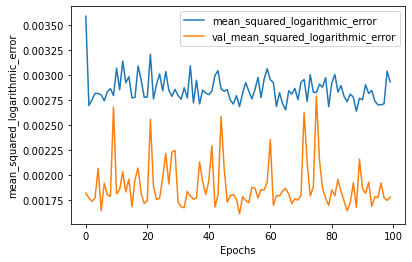

In [143]:
def plot_history(history, key):
  plt.plot(history.history[key])
  plt.plot(history.history['val_'+key])
  plt.xlabel("Epochs")
  plt.ylabel(key)
  plt.legend([key, 'val_'+key])
  plt.show()
# Plot the history
plot_history(history, 'mean_squared_logarithmic_error')


In [146]:
y= model.predict(x_test_scaled)

35/35 [==============================] - 0s 3ms/step


In [147]:
y

array([[1825.0398],
       [1671.9437],
       [1717.5988],
       ...,
       [1859.899 ],
       [1791.3773],
       [1778.0864]], dtype=float32)